# important libraries


In [1]:
import pandas as pd 
import numpy as np 
from sklearn.model_selection  import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.impute import SimpleImputer
pd.set_option('display.max_columns',12)

# load and split data to train ,Test

In [2]:
df=pd.read_csv("weatherHistory.csv")


In [3]:
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [4]:
df.shape

(96453, 12)

In [5]:
df['Formatted Date']


0        2006-04-01 00:00:00.000 +0200
1        2006-04-01 01:00:00.000 +0200
2        2006-04-01 02:00:00.000 +0200
3        2006-04-01 03:00:00.000 +0200
4        2006-04-01 04:00:00.000 +0200
                     ...              
96448    2016-09-09 19:00:00.000 +0200
96449    2016-09-09 20:00:00.000 +0200
96450    2016-09-09 21:00:00.000 +0200
96451    2016-09-09 22:00:00.000 +0200
96452    2016-09-09 23:00:00.000 +0200
Name: Formatted Date, Length: 96453, dtype: object

In [6]:
df['Date'] = pd.to_datetime(df['Formatted Date'], utc=True)

In [7]:
df.drop(['Formatted Date'],axis=1,inplace=True)
df.drop(columns=['Daily Summary'],axis=1,inplace=True)


In [8]:
df['Date']

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: Date, Length: 96453, dtype: datetime64[ns, UTC]

In [9]:
# Indexing according to date and time.
df = df.sort_values(by=['Date'])

In [10]:
# Setting Index
df = df.set_index('Date')
df.index

DatetimeIndex(['2005-12-31 23:00:00+00:00', '2006-01-01 00:00:00+00:00',
               '2006-01-01 01:00:00+00:00', '2006-01-01 02:00:00+00:00',
               '2006-01-01 03:00:00+00:00', '2006-01-01 04:00:00+00:00',
               '2006-01-01 05:00:00+00:00', '2006-01-01 06:00:00+00:00',
               '2006-01-01 07:00:00+00:00', '2006-01-01 08:00:00+00:00',
               ...
               '2016-12-31 13:00:00+00:00', '2016-12-31 14:00:00+00:00',
               '2016-12-31 15:00:00+00:00', '2016-12-31 16:00:00+00:00',
               '2016-12-31 17:00:00+00:00', '2016-12-31 18:00:00+00:00',
               '2016-12-31 19:00:00+00:00', '2016-12-31 20:00:00+00:00',
               '2016-12-31 21:00:00+00:00', '2016-12-31 22:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='Date', length=96453, freq=None)

In [11]:
train_data,test_data = train_test_split(df, test_size=0.25, random_state=42)

In [12]:
train_data.head(10)

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
Date,,,,,,,,,,
2015-06-12 22:00:00+00:00,Clear,rain,19.933333,19.933333,0.74,6.2951,160.0,16.1000,0.0,1014.48
2008-12-08 13:00:00+00:00,Partly Cloudy,rain,6.161111,3.250000,0.64,14.6349,310.0,11.2056,0.0,1022.95
2009-01-04 20:00:00+00:00,Overcast,snow,-6.111111,-11.811111,0.84,14.4900,220.0,4.9910,0.0,1020.20
2012-10-25 08:00:00+00:00,Foggy,rain,11.016667,11.016667,0.93,0.0000,0.0,2.5438,0.0,1016.41
2008-10-20 01:00:00+00:00,Foggy,rain,5.927778,4.755556,0.93,6.1502,60.0,1.2880,0.0,1026.41
2012-01-11 03:00:00+00:00,Overcast,rain,1.738889,1.738889,0.93,3.1234,287.0,9.4185,0.0,1030.02
2015-11-06 17:00:00+00:00,Foggy,rain,2.733333,0.050000,1.00,9.6600,0.0,0.0000,0.0,1026.63
2008-02-14 04:00:00+00:00,Foggy,snow,-2.705556,-7.855556,0.92,15.6170,329.0,1.9320,0.0,1031.78
2013-08-25 12:00:00+00:00,Mostly Cloudy,rain,27.572222,27.277778,0.40,6.7942,104.0,15.5526,0.0,1010.11


In [13]:
df['Loud Cover'].describe()


count    96453.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: Loud Cover, dtype: float64

In [14]:
df.drop(['Loud Cover'],axis=1,inplace=True)


In [15]:
df.duplicated().sum()

72

In [16]:
df.drop_duplicates(keep='first')


,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Date,,,,,,,,,
2005-12-31 23:00:00+00:00,Partly Cloudy,rain,0.577778,-4.050000,0.89,17.1143,140.0,9.9820,1016.66
2006-01-01 00:00:00+00:00,Mostly Cloudy,rain,1.161111,-3.238889,0.85,16.6152,139.0,9.9015,1016.15
2006-01-01 01:00:00+00:00,Mostly Cloudy,rain,1.666667,-3.155556,0.82,20.2538,140.0,9.9015,1015.87
2006-01-01 02:00:00+00:00,Overcast,rain,1.711111,-2.194444,0.82,14.4900,140.0,9.9015,1015.56
2006-01-01 03:00:00+00:00,Mostly Cloudy,rain,1.183333,-2.744444,0.86,13.9426,134.0,9.9015,1014.98
...,...,...,...,...,...,...,...,...,...
2016-12-31 18:00:00+00:00,Mostly Cloudy,rain,0.488889,-2.644444,0.86,9.7566,167.0,8.0178,1020.03
2016-12-31 19:00:00+00:00,Mostly Cloudy,rain,0.072222,-3.050000,0.88,9.4185,169.0,7.2450,1020.27
2016-12-31 20:00:00+00:00,Mostly Cloudy,snow,-0.233333,-3.377778,0.89,9.2736,175.0,9.5795,1020.50


# Visual Exploration 

In [17]:
#separate num and categorical data
num_cols = list(set(train_data.describe().columns.to_list()))
cat_cols = list(set(train_data.columns.to_list()) - set(num_cols))
print("numerical columns are {}".format(num_cols))
print("categorical columns are {}".format(cat_cols))

numerical columns are ['Visibility (km)', 'Pressure (millibars)', 'Wind Bearing (degrees)', 'Temperature (C)', 'Humidity', 'Loud Cover', 'Apparent Temperature (C)', 'Wind Speed (km/h)']
categorical columns are ['Precip Type', 'Summary']


In [18]:
train_data[num_cols]

,Visibility (km),Pressure (millibars),Wind Bearing (degrees),Temperature (C),Humidity,Loud Cover,Apparent Temperature (C),Wind Speed (km/h)
Date,,,,,,,,
2015-06-12 22:00:00+00:00,16.1000,1014.48,160.0,19.933333,0.74,0.0,19.933333,6.2951
2008-12-08 13:00:00+00:00,11.2056,1022.95,310.0,6.161111,0.64,0.0,3.250000,14.6349
2009-01-04 20:00:00+00:00,4.9910,1020.20,220.0,-6.111111,0.84,0.0,-11.811111,14.4900
2012-10-25 08:00:00+00:00,2.5438,1016.41,0.0,11.016667,0.93,0.0,11.016667,0.0000
2008-10-20 01:00:00+00:00,1.2880,1026.41,60.0,5.927778,0.93,0.0,4.755556,6.1502
...,...,...,...,...,...,...,...,...
2006-09-19 00:00:00+00:00,4.4436,1013.26,359.0,16.611111,0.96,0.0,16.611111,5.2647
2012-04-04 21:00:00+00:00,15.1501,1010.66,199.0,15.050000,0.71,0.0,15.050000,16.8567
2014-10-05 22:00:00+00:00,11.9301,1021.30,0.0,6.927778,0.93,0.0,6.927778,0.0000


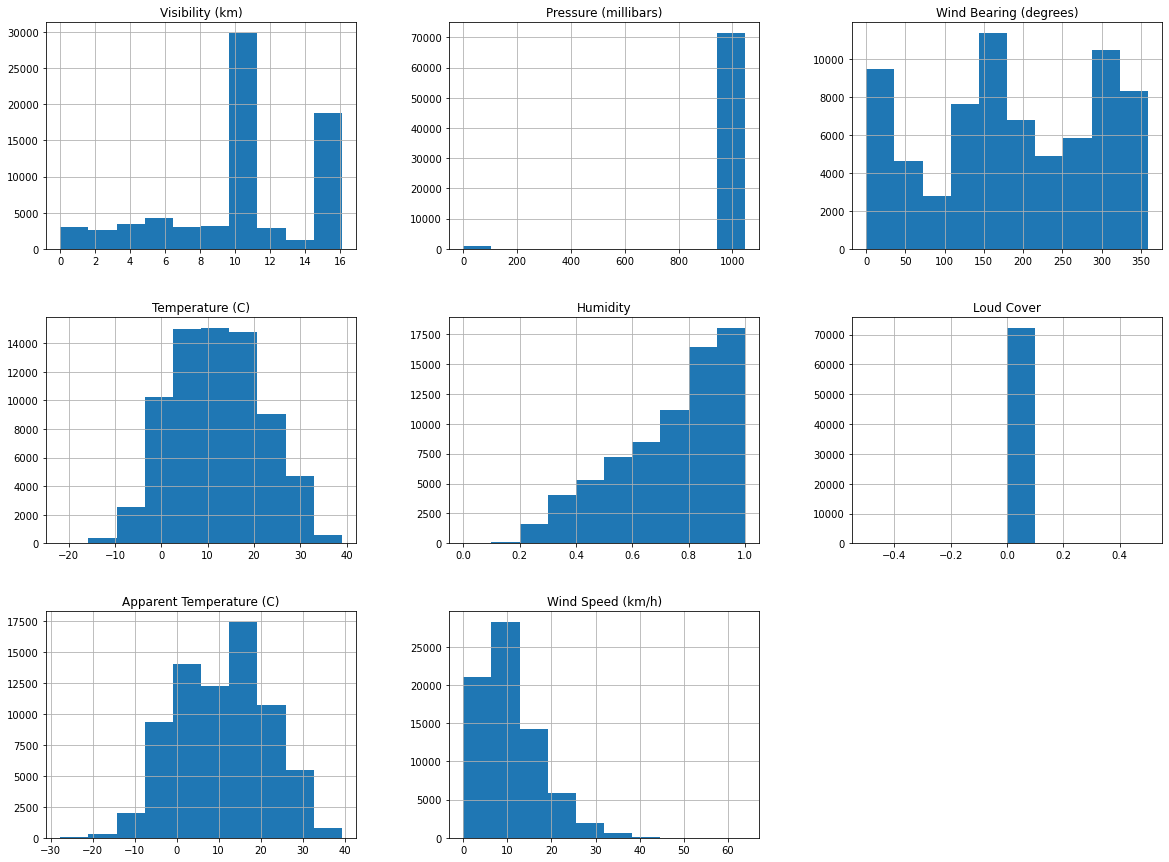

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data[num_cols].hist(bins = 10, figsize = (20, 15));

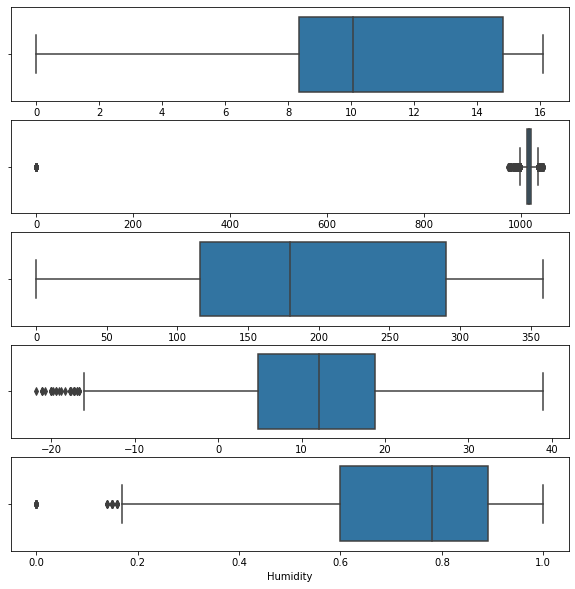

In [20]:
figure,axis = plt.subplots(5,1,figsize=(10,10))
c=0
for i in range(5):
    sns.boxplot(data=train_data,x=num_cols[c],ax=axis[c])
    c+=1

In [21]:
corr_matrix=train_data[num_cols].corr()

In [22]:
num_cols

['Visibility (km)',
 'Pressure (millibars)',
 'Wind Bearing (degrees)',
 'Temperature (C)',
 'Humidity',
 'Loud Cover',
 'Apparent Temperature (C)',
 'Wind Speed (km/h)']

In [23]:
corr_matrix

,Visibility (km),Pressure (millibars),Wind Bearing (degrees),Temperature (C),Humidity,Loud Cover,Apparent Temperature (C),Wind Speed (km/h)
Visibility (km),1.000000,0.057860,0.047150,0.396138,-0.370966,NaN,0.385077,0.100069
Pressure (millibars),0.057860,1.000000,-0.010135,-0.004937,0.006267,NaN,0.000807,-0.052644
Wind Bearing (degrees),0.047150,-0.010135,1.000000,0.030613,0.001249,NaN,0.029385,0.105005
Temperature (C),0.396138,-0.004937,0.030613,1.000000,-0.633265,NaN,0.992639,0.006405
Humidity,-0.370966,0.006267,0.001249,-0.633265,1.000000,NaN,-0.603435,-0.222517
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Apparent Temperature (C),0.385077,0.000807,0.029385,0.992639,-0.603435,NaN,1.000000,-0.059188
Wind Speed (km/h),0.100069,-0.052644,0.105005,0.006405,-0.222517,NaN,-0.059188,1.000000


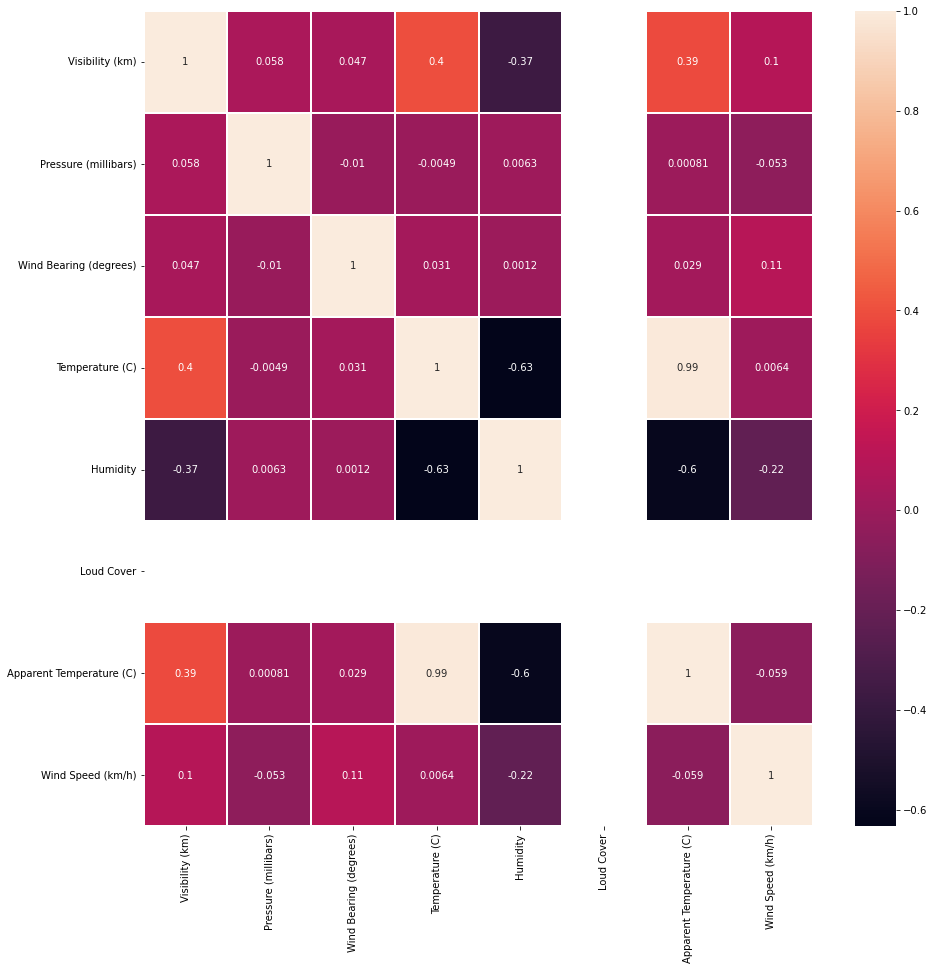

In [24]:
# making a heatmap to inspect the highly correlated features
import seaborn as sns
plt.subplots(figsize = (15, 15))
sns.heatmap(corr_matrix, annot=True,
           xticklabels = corr_matrix.columns.values,
           yticklabels = corr_matrix.columns.values, 
           linewidth = 0.1);

### EDA

### HANDLE NULLS


In [25]:
#To check the datatypes of dataset
train_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 72339 entries, 2015-06-12 22:00:00+00:00 to 2007-10-21 02:00:00+00:00
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Summary                   72339 non-null  object 
 1   Precip Type               71962 non-null  object 
 2   Temperature (C)           72339 non-null  float64
 3   Apparent Temperature (C)  72339 non-null  float64
 4   Humidity                  72339 non-null  float64
 5   Wind Speed (km/h)         72339 non-null  float64
 6   Wind Bearing (degrees)    72339 non-null  float64
 7   Visibility (km)           72339 non-null  float64
 8   Loud Cover                72339 non-null  float64
 9   Pressure (millibars)      72339 non-null  float64
dtypes: float64(8), object(2)
memory usage: 6.1+ MB


 we can see that there are 9 float type columns  3 object type columns


In [26]:
train_data.isna().sum()

Summary                       0
Precip Type                 377
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
dtype: int64

In [27]:
train_data['Precip Type'].replace([np.nan],"other", inplace=True)
test_data['Precip Type'].replace([np.nan],"other", inplace=True)


In [28]:
train_data['Precip Type']

Date
2015-06-12 22:00:00+00:00    rain
2008-12-08 13:00:00+00:00    rain
2009-01-04 20:00:00+00:00    snow
2012-10-25 08:00:00+00:00    rain
2008-10-20 01:00:00+00:00    rain
                             ... 
2006-09-19 00:00:00+00:00    rain
2012-04-04 21:00:00+00:00    rain
2014-10-05 22:00:00+00:00    rain
2006-02-05 19:00:00+00:00    snow
2007-10-21 02:00:00+00:00    rain
Name: Precip Type, Length: 72339, dtype: object

In [29]:
train_data.isna().sum()

Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
dtype: int64

In [30]:
# Summary

train_data['Summary'].astype('category').value_counts()

Partly Cloudy                          23851
Mostly Cloudy                          21037
Overcast                               12411
Clear                                   8134
Foggy                                   5393
Breezy and Overcast                      400
Breezy and Mostly Cloudy                 386
Breezy and Partly Cloudy                 284
Dry and Partly Cloudy                     64
Windy and Partly Cloudy                   56
Light Rain                                53
Breezy                                    45
Windy and Overcast                        39
Humid and Mostly Cloudy                   34
Drizzle                                   33
Breezy and Foggy                          28
Dry                                       26
Windy and Mostly Cloudy                   23
Humid and Partly Cloudy                   12
Dry and Mostly Cloudy                      8
Windy                                      6
Humid and Overcast                         5
Rain      

### Weather most of time `Partly Cloudy`  or `Mostly Cloudy`

divide the Temperature values into 3 different bins, namely: low, medium, high
We'll use the quantile values to create this bins

### handle skweness



In [31]:
# Handle  skweness
def skewness_calc(col ,df):
    std_col = np.std(df[col])
    mean_col = np.mean(df[col])
    size_rows = df.count()[0]
    df['diff_col'] = df[col] - mean_col
    df['diff_col_powered'] = np.power(df['diff_col'], 3)
    skewness = np.sum(df['diff_col_powered'])/((size_rows - 1) * np.power(std_col, 3))
    df.drop(columns = ['diff_col_powered', 'diff_col'], inplace = True)
    return skewness

def skewed_data_transformation(value):
  return np.log(1 + np.abs(value))

In [32]:
skewed_cols = []
for col in num_cols: 
  sk = skewness_calc(col, train_data)
  if (np.abs(sk) >= 1):
    skewed_cols.append(col)
    train_data[col] = train_data[col].apply(lambda x : skewed_data_transformation(x))
    test_data[col] = test_data[col].apply(lambda x : skewed_data_transformation(x))

C:\Users\AYATOL~1\AppData\Local\Temp/ipykernel_13548/3596089566.py:8: RuntimeWarning: invalid value encountered in double_scalars
  skewness = np.sum(df['diff_col_powered'])/((size_rows - 1) * np.power(std_col, 3))


In [33]:
skewed_cols

['Pressure (millibars)', 'Wind Speed (km/h)']

### Shapiro Wilk Test

In [34]:
feats_std_scale = []
feats_min_max_scale = []
sample_data  = train_data.sample(replace = False, n= 100)

from scipy.stats import shapiro
for col in num_cols:
    stat, p = shapiro(sample_data[col])
    print('W_Statistic=%.3f, p=%.8f' % (stat, p))

    alpha = 0.001
    if p > alpha:
        print(f'{col} looks like gaussian (fail to reject H0)')
        feats_std_scale.append(col)
    else:
        print(f'{col} does not look Gaussian (reject H0)')
        feats_min_max_scale.append(col)

W_Statistic=0.889, p=0.00000045
Visibility (km) does not look Gaussian (reject H0)
W_Statistic=0.081, p=0.00000000
Pressure (millibars) does not look Gaussian (reject H0)
W_Statistic=0.952, p=0.00112752
Wind Bearing (degrees) looks like gaussian (fail to reject H0)
W_Statistic=0.989, p=0.57513916
Temperature (C) looks like gaussian (fail to reject H0)
W_Statistic=0.923, p=0.00002083
Humidity does not look Gaussian (reject H0)
W_Statistic=1.000, p=1.00000000
Loud Cover looks like gaussian (fail to reject H0)
W_Statistic=0.983, p=0.22418050
Apparent Temperature (C) looks like gaussian (fail to reject H0)
W_Statistic=0.982, p=0.19587161
Wind Speed (km/h) looks like gaussian (fail to reject H0)


C:\Users\Ayatollah Elghali\anaconda3\lib\site-packages\scipy\stats\morestats.py:1757: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


In [35]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

min_max_scaler = MinMaxScaler()
std_scaler = StandardScaler()
# fitting
min_max_scaler_model = min_max_scaler.fit(train_data[feats_min_max_scale])
std_scaler_model = std_scaler.fit(train_data[feats_std_scale])
# transforming min_max_scale
train_data[feats_min_max_scale] = min_max_scaler_model.transform(train_data[feats_min_max_scale])
test_data[feats_min_max_scale] = min_max_scaler_model.transform(test_data[feats_min_max_scale])
# tranforming std_scale
train_data[feats_std_scale] = std_scaler_model.transform(train_data[feats_std_scale])
test_data[feats_std_scale]=std_scaler_model.transform(test_data[feats_std_scale])


In [36]:
feats_std_scale

['Wind Bearing (degrees)',
 'Temperature (C)',
 'Loud Cover',
 'Apparent Temperature (C)',
 'Wind Speed (km/h)']

In [37]:
Q1 = train_data["Temperature (C)"].quantile(0.25)
Q2 = train_data["Temperature (C)"].quantile(0.5)
Q3 = train_data["Temperature (C)"].quantile(0.75)


def convert_temp(x):
    if x <= Q1:
        return 'low'
    elif (x > Q1) and (x < Q3):
        return 'medium'
    else:
        return 'high'
    

In [38]:
train_data['Temperature_discrete'] = train_data["Temperature (C)"].apply(convert_temp)
test_data['Temperature_discrete'] = test_data["Temperature (C)"].apply(convert_temp)


In [39]:
train_data['Temperature_discrete']

Date
2015-06-12 22:00:00+00:00      high
2008-12-08 13:00:00+00:00    medium
2009-01-04 20:00:00+00:00       low
2012-10-25 08:00:00+00:00    medium
2008-10-20 01:00:00+00:00    medium
                              ...  
2006-09-19 00:00:00+00:00    medium
2012-04-04 21:00:00+00:00    medium
2014-10-05 22:00:00+00:00    medium
2006-02-05 19:00:00+00:00       low
2007-10-21 02:00:00+00:00       low
Name: Temperature_discrete, Length: 72339, dtype: object

In [40]:
train_data['Temperature_discrete']

Date
2015-06-12 22:00:00+00:00      high
2008-12-08 13:00:00+00:00    medium
2009-01-04 20:00:00+00:00       low
2012-10-25 08:00:00+00:00    medium
2008-10-20 01:00:00+00:00    medium
                              ...  
2006-09-19 00:00:00+00:00    medium
2012-04-04 21:00:00+00:00    medium
2014-10-05 22:00:00+00:00    medium
2006-02-05 19:00:00+00:00       low
2007-10-21 02:00:00+00:00       low
Name: Temperature_discrete, Length: 72339, dtype: object

In [41]:
# train_dummies1 = pd.get_dummies(train_data['Temperature_discrete'])
# test_dummies1 = pd.get_dummies(test_data['Temperature_discrete'])
# train_dummies2 = pd.get_dummies(train_data['Precip Type'])
# test_dummies2 = pd.get_dummies(test_data['Precip Type'])
Temperature_discrete1=pd.get_dummies(train_data['Temperature_discrete'])

PrecipType1=pd.get_dummies(train_data['Precip Type'])

Temperature_discrete2=pd.get_dummies(test_data['Temperature_discrete'])

PrecipType2=pd.get_dummies(test_data['Precip Type'])

In [42]:
 train_data = pd.concat([train_data,Temperature_discrete1,PrecipType1], axis=1)
 test_data = pd.concat([test_data,Temperature_discrete2,PrecipType2], axis=1)


In [43]:
train_data.drop(['Temperature_discrete','Summary','Precip Type'],axis=1,inplace=True)
test_data.drop(['Temperature_discrete','Summary','Precip Type'],axis=1,inplace=True)

### MODEL

# Linear Regression, Multiple regression, SVR regression, Polynomial regression

In [44]:
ytrain=train_data['Apparent Temperature (C)']
Xtrain = train_data.drop('Apparent Temperature (C)',1)


C:\Users\AYATOL~1\AppData\Local\Temp/ipykernel_13548/2728185713.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Xtrain = train_data.drop('Apparent Temperature (C)',1)


In [45]:
ytest=test_data['Apparent Temperature (C)']
Xtest = test_data.drop('Apparent Temperature (C)',1)


C:\Users\AYATOL~1\AppData\Local\Temp/ipykernel_13548/1778652632.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  Xtest = test_data.drop('Apparent Temperature (C)',1)


In [46]:
Xtest.columns

Index(['Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'high', 'low', 'medium', 'other', 'rain',
       'snow'],
      dtype='object')

In [47]:
Xtrain.columns

Index(['Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'high', 'low', 'medium', 'other', 'rain',
       'snow'],
      dtype='object')

In [48]:
Xtest

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,...,high,low,medium,other,rain,snow
Date,,,,,,,,,,,,,
2015-12-12 16:00:00+00:00,-1.225755,0.99,0.451678,-0.059812,0.042,0.0,...,0,1,0,0,1,0
2009-10-24 12:00:00+00:00,0.619325,0.78,0.242971,1.477291,0.644,0.0,...,0,0,1,0,1,0
2006-10-11 14:00:00+00:00,0.956273,0.49,0.259772,-1.065915,0.620,0.0,...,1,0,0,0,1,0
2010-04-05 19:00:00+00:00,-0.214330,0.87,1.078702,0.983555,0.686,0.0,...,0,0,1,0,1,0
2006-05-06 15:00:00+00:00,0.192912,0.61,0.647918,-1.261546,0.711,0.0,...,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-01-31 18:00:00+00:00,-0.974787,0.78,-2.839282,1.197818,0.611,0.0,...,0,1,0,0,1,0
2014-11-25 15:00:00+00:00,-0.733114,0.76,0.010506,-1.354704,0.487,0.0,...,0,0,1,0,1,0
2015-12-14 19:00:00+00:00,-1.030558,0.86,0.280513,-0.898231,0.374,0.0,...,0,1,0,0,1,0


In [49]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(Xtrain, ytrain)

In [50]:
reg_pred = reg.predict(Xtrain)

In [51]:
reg_predd = reg.predict(Xtest)

In [52]:
len(reg_pred)

72339

In [53]:
len(ytrain)

72339

## Evaluating our linear regression model

In [54]:
def mse(actual, predicted):
  return np.mean(np.square(actual-predicted))

def rmse(actual, predicted):
  return np.sqrt(np.mean(np.square(actual-predicted)))

def mae(actual, predicted):
  return np.mean(np.abs(actual-predicted))

def mape(actual, predicted, epsilon = 0.0001):
  return np.mean(np.abs((actual - predicted) / (actual + epsilon))) * 100

def rae(actual, predicted):
  numerator = np.sum(np.abs(predicted - actual))
  denominator = np.sum(np.abs(np.mean(actual) - actual))
  return numerator / denominator

def r_squared(actual, predicted):
  sse = np.sum(np.square(actual-predicted))
  sst = np.sum(np.square(actual-np.mean(actual)))
  return 1 - (sse/sst)

def adj_r_squared(X, actual, predicted): 
  r_squ = r_squared(actual, predicted)
  first_term = 1 - r_squ
  sec_term = (len(actual)-1)/(len(actual) - X.shape[1] - 1)
  return 1 - (first_term * sec_term)

In [55]:
print("#"*5,"Evaluation train Data","#"*5)
print('The mean squared error is: ', mse(ytrain, reg_pred))
print('the root mean squard error is: ', rmse(ytrain, reg_pred))
print('The mean absolute error is: ', mae(ytrain, reg_pred))
print('The mean absolute perentage error is: ', mape(ytrain, reg_pred))
print('The relative absolute error is: ', rae(ytrain, reg_pred))
print('The coefficient of determination is: ', r_squared(ytrain, reg_pred))
print('The adjusted coefficient of determination is: ', adj_r_squared(Xtrain, ytrain, reg_pred))

##### Evaluation train Data #####
The mean squared error is:  0.008951248784183184
the root mean squard error is:  0.09461103944140549
The mean absolute error is:  0.07439192402026264
The mean absolute perentage error is:  87.73724854288709
The relative absolute error is:  0.08837883916494349
The coefficient of determination is:  0.9910487512158169
The adjusted coefficient of determination is:  0.9910471422806743


In [56]:
print("#"*5,"Evaluation test Data","#"*5)
print('The mean squared error is: ', mse(ytest, reg_predd))
print('the root mean squard error is: ', rmse(ytest, reg_predd))
print('The mean absolute error is: ', mae(ytest, reg_predd))
print('The mean absolute perentage error is: ', mape(ytest, reg_predd))
print('The relative absolute error is: ', rae(ytest, reg_predd))
print('The coefficient of determination is: ', r_squared(ytest, reg_predd))
print('The adjusted coefficient of determination is: ', adj_r_squared(Xtest, ytest, reg_predd))

##### Evaluation test Data #####
The mean squared error is:  0.008850749799189117
the root mean squard error is:  0.09407842366445729
The mean absolute error is:  0.0740976476388405
The mean absolute perentage error is:  96.7007098901347
The relative absolute error is:  0.08824272838100285
The coefficient of determination is:  0.9910762213390604
The adjusted coefficient of determination is:  0.9910714076825212


In [57]:
r_squared(ytest,reg_predd)

0.9910762213390604

## Handling Multicolinearity

In [58]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def VIF_Calculation(X_train):
  vif_data = pd.DataFrame()
  vif_data["feature"] = X_train.columns
    
  vif_data["VIF"] = [variance_inflation_factor(X_train.values, i)
                            for i in range(len(X_train.columns))]
    
  return vif_data

In [59]:
vif_data = VIF_Calculation(Xtrain)

C:\Users\Ayatollah Elghali\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1715: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss
C:\Users\Ayatollah Elghali\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [60]:
len(vif_data[vif_data['VIF'] > 20])

6

In [61]:
train_feats_high_vif_to_be_dropped = []
cleaned_train_df_from_multi_coll = Xtrain
num_cols_removed = 0
for index in range(len(Xtrain.columns)):
  num_cols_removed = Xtrain.shape[1] - cleaned_train_df_from_multi_coll.shape[1]
  cleaned_df_feat_index = index - num_cols_removed
  VIF_FEAT = variance_inflation_factor(cleaned_train_df_from_multi_coll.values, cleaned_df_feat_index)
  if VIF_FEAT > 20:
    train_feats_high_vif_to_be_dropped.append(cleaned_train_df_from_multi_coll.columns[cleaned_df_feat_index])
    cleaned_train_df_from_multi_coll = cleaned_train_df_from_multi_coll.drop(columns = [cleaned_train_df_from_multi_coll.columns[cleaned_df_feat_index]])

In [62]:
cleaned_train_df_from_multi_coll.shape

(72339, 11)

In [63]:
cleaned_train_df_from_multi_coll

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),low,medium,other,snow
Date,,,,,,,,,,,
2015-06-12 22:00:00+00:00,0.833694,0.74,-0.440003,-0.255443,1.000,0.0,0.995552,0,0,0,0
2008-12-08 13:00:00+00:00,-0.606468,0.64,0.708032,1.141923,0.696,0.0,0.996747,0,1,0,0
2009-01-04 20:00:00+00:00,-1.889775,0.84,0.694010,0.303504,0.310,0.0,0.996360,1,0,0,1
2012-10-25 08:00:00+00:00,-0.098722,0.93,-3.432751,-1.745966,0.158,0.0,0.995825,0,1,0,0
2008-10-20 01:00:00+00:00,-0.630868,0.93,-0.470218,-1.187020,0.080,0.0,0.997232,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2006-09-19 00:00:00+00:00,0.486289,0.96,-0.669327,1.598396,0.276,0.0,0.995379,0,1,0,0
2012-04-04 21:00:00+00:00,0.323044,0.71,0.908141,0.107872,0.941,0.0,0.995010,0,1,0,0
2014-10-05 22:00:00+00:00,-0.526298,0.93,-3.432751,-1.745966,0.741,0.0,0.996515,0,1,0,0


##  measure the significance level of each feature and perform subset selection using the backward-stepwise method


In [64]:
from statsmodels.api import OLS

LRres = OLS(ytrain,cleaned_train_df_from_multi_coll).fit().summary().tables[1]

In [65]:
LRres
# t_statistics=coeff/standard error
#

,coef,std err,t,P>|t|,[0.025,0.975]
Temperature (C),0.9944,0.001,1137.534,0.000,0.993,0.996
Humidity,0.0163,0.002,7.230,0.000,0.012,0.021
Wind Speed (km/h),-0.0658,0.000,-178.440,0.000,-0.067,-0.065
Wind Bearing (degrees),0.0068,0.000,19.028,0.000,0.006,0.007
Visibility (km),-0.0369,0.001,-24.876,0.000,-0.040,-0.034
Loud Cover,3.372e-18,9e-19,3.746,0.000,1.61e-18,5.14e-18
Pressure (millibars),-0.0121,0.002,-5.881,0.000,-0.016,-0.008
low,-0.0244,0.002,-10.714,0.000,-0.029,-0.020
medium,0.0586,0.001,40.521,0.000,0.056,0.061
other,0.0163,0.005,3.326,0.001,0.007,0.026


In [66]:
significant_feats_df = cleaned_train_df_from_multi_coll
LRresult = (OLS(ytrain,significant_feats_df).fit().summary2().tables[1]).reset_index().rename(columns = {'index' : 'feature_name'})
insignificant_feats_ls = []
# if the results contain an insignificant feature (a feature with p-value > 0.05), 
# then we can drop it form the model and re-calculate the summary table
while LRresult['P>|t|'].max() > 0.05: 
  # get the feature with the max p-value (that fail to reject that coffeciants are zeros)
  insignificant_feat = LRresult[LRresult['P>|t|'] == LRresult['P>|t|'].max()][['feature_name']].values[0, 0]
  insignificant_feats_ls.append(insignificant_feat)
  significant_feats_df = significant_feats_df.drop(columns = [insignificant_feat])
  LRresult = (OLS(ytrain,significant_feats_df).fit().summary2().tables[1]).reset_index().rename(columns = {'index' : 'feature_name'})

## Measuring the whole model significance using the F-statistic, and re-evaluating the model after the subset-selection

In [67]:
train_feats_high_vif_to_be_dropped

['high', 'rain']

In [68]:
#drop these columns from test data
test_data_cleaned_from_multicolinearity=Xtest.drop(train_feats_high_vif_to_be_dropped,axis=1)

In [69]:
insignificant_feats_ls

[]

## THere is No  insignificant features

In [70]:
reg2 = LinearRegression().fit(cleaned_train_df_from_multi_coll, ytrain)

In [71]:
pred3=reg2.predict(cleaned_train_df_from_multi_coll)

In [72]:
print('The mean squared error is: ', mse(ytrain, pred3))
print('the root mean squard error is: ', rmse(ytrain, pred3))
print('The mean absolute error is: ', mae(ytrain, pred3))
print('The mean absolute perentage error is: ', mape(ytrain, pred3))
print('The relative absolute error is: ', rae(ytrain, pred3))
print('The coefficient of determination is: ', r_squared(ytrain, pred3))
print('The adjusted coefficient of determination is: ', adj_r_squared(cleaned_train_df_from_multi_coll, ytrain,pred3))

The mean squared error is:  0.008951197516315243
the root mean squard error is:  0.0946107685008173
The mean absolute error is:  0.07440663608334898
The mean absolute perentage error is:  87.70103387588323
The relative absolute error is:  0.08839631733981904
The coefficient of determination is:  0.9910488024836848
The adjusted coefficient of determination is:  0.9910474411224687


In [73]:
test_pred3=reg2.predict(test_data_cleaned_from_multicolinearity)

In [74]:
print('The mean squared error is: ', mse(ytest, test_pred3))
print('the root mean squard error is: ', rmse(ytest, test_pred3))
print('The mean absolute error is: ', mae(ytest, test_pred3))
print('The mean absolute perentage error is: ', mape(ytest, test_pred3))
print('The relative absolute error is: ', rae(ytest, test_pred3))
print('The coefficient of determination is: ', r_squared(ytest, test_pred3))
print('The adjusted coefficient of determination is: ', adj_r_squared(test_data_cleaned_from_multicolinearity, ytest,test_pred3))

The mean squared error is:  0.008851026682260763
the root mean squard error is:  0.09407989520753499
The mean absolute error is:  0.0741141330283171
The mean absolute perentage error is:  96.65815378100503
The relative absolute error is:  0.08826236079569029
The coefficient of determination is:  0.9910759421713851
The adjusted coefficient of determination is:  0.9910718692879681


NO Signifanct Difference between reults before n after handling multicolinearity

In [75]:
cleaned_train_df_from_multi_coll

,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),low,medium,other,snow
Date,,,,,,,,,,,
2015-06-12 22:00:00+00:00,0.833694,0.74,-0.440003,-0.255443,1.000,0.0,0.995552,0,0,0,0
2008-12-08 13:00:00+00:00,-0.606468,0.64,0.708032,1.141923,0.696,0.0,0.996747,0,1,0,0
2009-01-04 20:00:00+00:00,-1.889775,0.84,0.694010,0.303504,0.310,0.0,0.996360,1,0,0,1
2012-10-25 08:00:00+00:00,-0.098722,0.93,-3.432751,-1.745966,0.158,0.0,0.995825,0,1,0,0
2008-10-20 01:00:00+00:00,-0.630868,0.93,-0.470218,-1.187020,0.080,0.0,0.997232,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2006-09-19 00:00:00+00:00,0.486289,0.96,-0.669327,1.598396,0.276,0.0,0.995379,0,1,0,0
2012-04-04 21:00:00+00:00,0.323044,0.71,0.908141,0.107872,0.941,0.0,0.995010,0,1,0,0
2014-10-05 22:00:00+00:00,-0.526298,0.93,-3.432751,-1.745966,0.741,0.0,0.996515,0,1,0,0


## polynomial Regression

In [76]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(Xtrain)
testx_poly=poly.transform(Xtest)
poly_feats_linear_reg = LinearRegression()
poly_feats_linear_reg.fit(X_poly, ytrain)
polytrainpred=poly_feats_linear_reg.predict(X_poly)
polytestpred=poly_feats_linear_reg.predict(testx_poly)



In [77]:
print("#"*5,"Evaluation of polynomial Regression on train Data","#"*5)
print('The mean squared error is: ', mse(ytrain, polytrainpred))
print('the root mean squard error is: ', rmse(ytrain, polytrainpred))
print('The mean absolute error is: ', mae(ytrain, polytrainpred))
print('The mean absolute perentage error is: ', mape(ytrain, polytrainpred))
print('The relative absolute error is: ', rae(ytrain, polytrainpred))
print('The coefficient of determination is: ', r_squared(ytrain, polytrainpred))
print('The adjusted coefficient of determination is: ', adj_r_squared(Xtrain, ytrain, polytrainpred))

##### Evaluation of polynomial Regression on train Data #####
The mean squared error is:  0.0012321513162444659
the root mean squard error is:  0.0351020129941926
The mean absolute error is:  0.024243123760658347
The mean absolute perentage error is:  53.66520349966483
The relative absolute error is:  0.028801232982164075
The coefficient of determination is:  0.9987678486837556
The adjusted coefficient of determination is:  0.9987676272116904


In [78]:
print("#"*5,"Evaluation of polynomial Regression on test Data","#"*5,"\n")
print('The mean squared error is: ', mse(ytest, polytestpred))
print('the root mean squard error is: ', rmse(ytest, polytestpred))
print('The mean absolute error is: ', mae(ytest, polytestpred))
print('The mean absolute perentage error is: ', mape(ytest, polytestpred))
print('The relative absolute error is: ', rae(ytest, polytestpred))
print('The coefficient of determination is: ', r_squared(ytest, polytestpred))
print('The adjusted coefficient of determination is: ', adj_r_squared(Xtest, ytest, polytestpred))

##### Evaluation of polynomial Regression on test Data ##### 

The mean squared error is:  0.0012617537585014854
the root mean squard error is:  0.03552117338294845
The mean absolute error is:  0.0245107644993608
The mean absolute perentage error is:  58.978343239677464
The relative absolute error is:  0.029189816452338722
The coefficient of determination is:  0.998727835322324
The adjusted coefficient of determination is:  0.9987271490924149


### SVR regression

In [79]:
from sklearn.svm import SVR
svr_sklearn  = SVR(kernel = 'rbf', C = 100, gamma = 0.1, epsilon= 0.1)

SVR_model = svr_sklearn.fit(Xtrain.values, ytrain.values.flatten())
SVR_tpred=SVR_model.predict(Xtrain.values)
SVR_testpred=SVR_model.predict(Xtest.values)

In [80]:
print("#"*5,"Evaluation of SVR model on train Data","#"*5)
print('The mean squared error is: ', mse(ytrain, SVR_tpred))
print('the root mean squard error is: ', rmse(ytrain, SVR_tpred))
print('The mean absolute error is: ', mae(ytrain, SVR_tpred))
print('The mean absolute perentage error is: ', mape(ytrain, SVR_tpred))
print('The relative absolute error is: ', rae(ytrain, SVR_tpred))
print('The coefficient of determination is: ', r_squared(ytrain, SVR_tpred))
print('The adjusted coefficient of determination is: ', adj_r_squared(Xtrain, ytrain, SVR_tpred))

##### Evaluation of SVR model on train Data #####
The mean squared error is:  0.0022034800851943055
the root mean squard error is:  0.0469412407717809
The mean absolute error is:  0.03778481697372182
The mean absolute perentage error is:  41.37003729793341
The relative absolute error is:  0.04488898904251886
The coefficient of determination is:  0.9977965199148057
The adjusted coefficient of determination is:  0.9977961238520181


In [81]:
print("#"*5,"Evaluation of SVR model on test Data","#"*5,"\n")
print('The mean squared error is: ', mse(ytest, SVR_testpred))
print('the root mean squard error is: ', rmse(ytest, SVR_testpred))
print('The mean absolute error is: ', mae(ytest, SVR_testpred))
print('The mean absolute perentage error is: ', mape(ytest, SVR_testpred))
print('The relative absolute error is: ', rae(ytest, SVR_testpred))
print('The coefficient of determination is: ', r_squared(ytest, SVR_testpred))
print('The adjusted coefficient of determination is: ', adj_r_squared(Xtest, ytest, SVR_testpred))

##### Evaluation of SVR model on test Data ##### 

The mean squared error is:  0.00222682476938384
the root mean squard error is:  0.04718924421289072
The mean absolute error is:  0.037830137444657165
The mean absolute perentage error is:  36.72706757907788
The relative absolute error is:  0.04505182889766974
The coefficient of determination is:  0.997754801366038
The adjusted coefficient of determination is:  0.9977535902630404
